In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb

In [2]:
df = pd.read_csv("data\Data-Science-Job_Listing.csv")

In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        500 non-null    int64  
 1   Job Title       500 non-null    object 
 2   Company Name    500 non-null    object 
 3   Location        500 non-null    object 
 4   Salary          438 non-null    object 
 5   Date            500 non-null    object 
 6   Logo            436 non-null    object 
 7   Job Link        500 non-null    object 
 8   Company Rating  439 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 35.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Position,500.0,250.500000,144.481833,1.0,125.75,250.5,375.25,500.0
Company Rating,439.0,3.812301,0.480281,1.0,3.60,3.8,4.00,5.0


<Axes: >

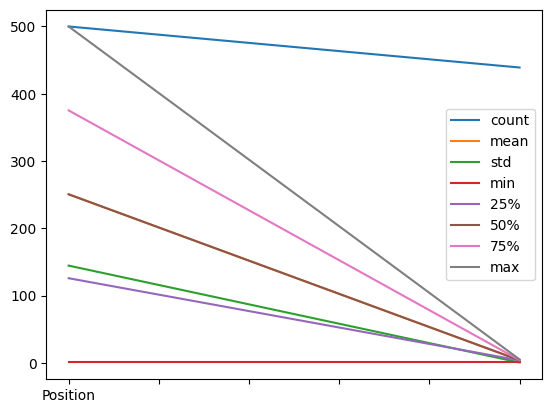

In [6]:
df.describe().T.plot()

In [7]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Position,500.0,NaN,NaN,NaN,250.5,144.481833,1.0,125.75,250.5,375.25,500.0
Job Title,500,298,Data Scientist,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company Name,500,259,Discover Financial Services\n3.9,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,500,162,Remote,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,438,267,$127K - $177K (Employer est.),12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,500,27,30d+,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logo,436,207,https://media.glassdoor.com/sql/13990/discover...,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Link,500,500,https://www.glassdoor.com/partner/jobListing.h...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company Rating,439.0,NaN,NaN,NaN,3.812301,0.480281,1.0,3.6,3.8,4.0,5.0


In [8]:
df.isna().sum()

Position           0
Job Title          0
Company Name       0
Location           0
Salary            62
Date               0
Logo              64
Job Link           0
Company Rating    61
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

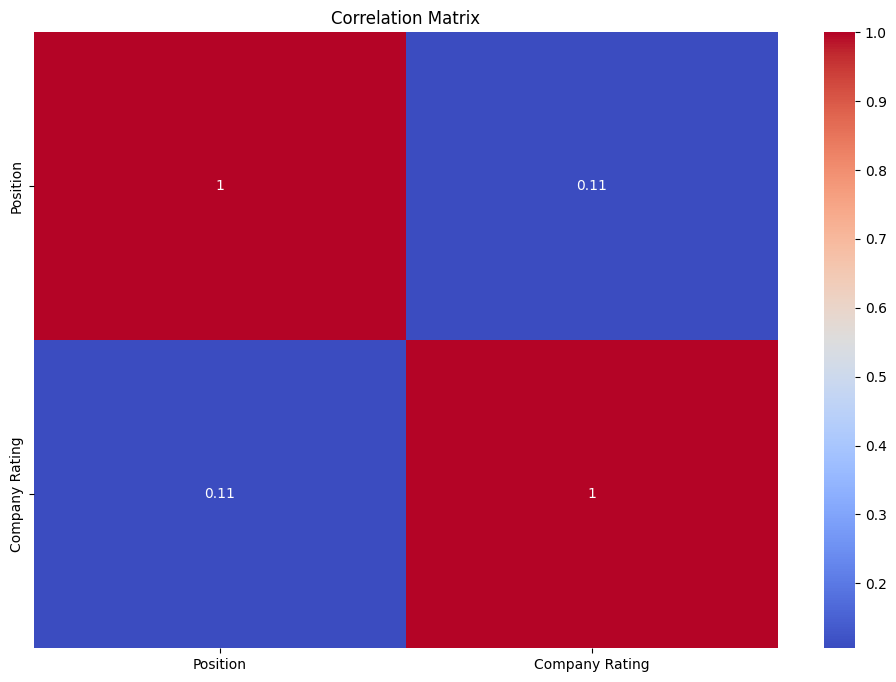

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [11]:
df.columns.tolist()

['Position',
 'Job Title',
 'Company Name',
 'Location',
 'Salary',
 'Date',
 'Logo',
 'Job Link',
 'Company Rating']

In [13]:
import plotly.express as px

for column in ['Position',
 'Job Title',
 'Company Name',
 'Location',
 'Salary',
 'Date',
 'Logo',
 'Job Link',
 'Company Rating']:

    fig = px.histogram(data_frame=df, x=column)
    fig.show()


In [14]:
df

,Position,Job Title,Company Name,Location,Salary,Date,Logo,Job Link,Company Rating
0,1,Associate Stop Loss Underwriter,The Insurance Center\n2.7,"Onalaska, WI",$57K - $84K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/453835/the-ins...,https://www.glassdoor.com/partner/jobListing.h...,2.7
1,2,Manager of Data Science,"Nuvative, Inc.\n3.4","Wichita, KS",$106K - $157K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/1384674/net-pa...,https://www.glassdoor.com/partner/jobListing.h...,3.4
2,3,Senior Data Product Manager,ProviderTrust\n4.2,"Nashville, TN",$105K - $141K (Glassdoor est.),11d,https://media.glassdoor.com/sql/1953857/hibob-...,https://www.glassdoor.com/partner/jobListing.h...,4.2
3,4,Oncology Nurse Navigator,Inizio Engage\n3.6,"Portland, OR",$90K - $113K (Employer est.),1d,https://media.glassdoor.com/sql/8794153/inizio...,https://www.glassdoor.com/partner/jobListing.h...,3.6
4,5,Head of Artificial Intelligence – Americas Region,Covestro\n3.6,"Pittsburgh, PA",$89K - $148K (Glassdoor est.),30d+,https://media.glassdoor.com/sql/27128/covestro...,https://www.glassdoor.com/partner/jobListing.h...,3.6
...,...,...,...,...,...,...,...,...,...
495,496,Cloud Administrator,GM Financial\n4.0,"Arlington, TX",NaN,25d,https://media.glassdoor.com/sql/488523/gm-fina...,https://www.glassdoor.com/partner/jobListing.h...,4.0
496,497,Robotics Engineer (AI),Alpha Net Consulting,United States,$44.12 - $70.00 Per Hour (Employer est.),4d,NaN,https://www.glassdoor.com/partner/jobListing.h...,NaN
497,498,Tchr of English- Newark School of Data Science...,Newark Board of Education\n3.3,"Newark, NJ",$62K - $107K (Employer est.),30d+,https://media.glassdoor.com/sql/137673/newark-...,https://www.glassdoor.com/partner/jobListing.h...,3.3
498,499,Statistician,Sciome LLC,"Research Triangle Park, NC",$33.00 - $39.00 Per Hour (Employer est.),30d+,https://media.glassdoor.com/sql/2418223/sciome...,https://www.glassdoor.com/partner/jobListing.h...,NaN


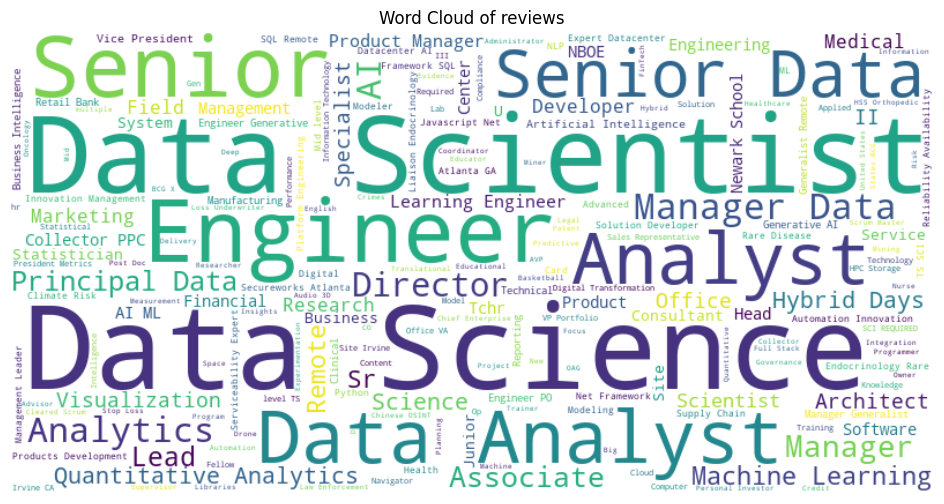

In [19]:
from wordcloud import WordCloud
reviews_text = ' '.join(df['Job Title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of reviews')
plt.axis('off')
plt.show()